### Step1. 데이터 준비 및 확인

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import konlpy

In [2]:
import pandas as pd
train_data = pd.read_table('./data/ratings_train.txt')
test_data = pd.read_table('./data/ratings_test.txt')
print('train data 개수: ', len(train_data))
print('test data 개수: ', len(test_data))
train_data.head()

train data 개수:  150000
test data 개수:  50000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


__train, test 데이터 전처리 및 중복&결측치 제거__

In [3]:
train_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","") # 정규 표현식 수행
train_data['document'] = train_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
train_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거
print('train data 개수 :',len(train_data))

train data 개수 : 146182


In [4]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('test data 개수 :',len(test_data))

test data 개수 : 49157


In [5]:
train_data['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 146182, dtype: object

In [6]:
test_data['document']

0                                                      굳 ㅋ
1                                     GDNTOPCLASSINTHECLUB
2                   뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                         지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4        3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
                               ...                        
49995            오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997                   그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다
49998       절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네
49999                                           마무리는 또 왜이래
Name: document, Length: 49157, dtype: object

__문장 길이 분포 확인__

min_len of sentence: 1
max_len of sentence: 146
mean_len of sentence: 35


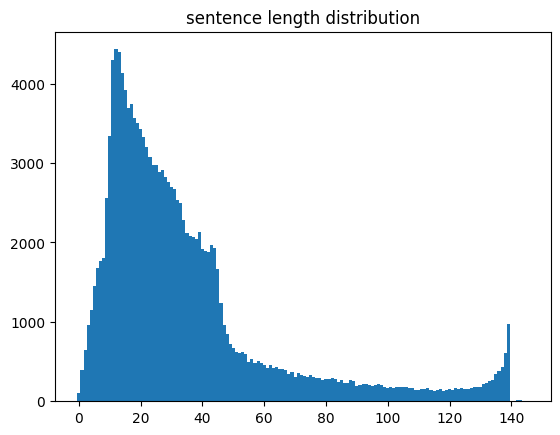

In [7]:
min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['document']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('min_len of sentence:', min_len)
print('max_len of sentence:', max_len)
print('mean_len of sentence:', sum_len // len(train_data['document']))

sentence_length = np.zeros((max_len), dtype=int)

for sen in train_data['document']:
    sentence_length[len(sen)-1] += 1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('sentence length distribution')
plt.show()

In [8]:
# 길이 1인 문장 확인

document = train_data['document']

def check_sentence_with_length(document, length):
    count = 0
    
    for sen in document:
        if len(sen)==length:
            print(sen)
            count += 1
            if count > 20: return
check_sentence_with_length(document, 1)

아
잼
1
4
굿
짱
휴
.
음
?
ㅎ
ㅋ
즐
♥
굳
네
ㅇ
k
ㅠ
쒯
♬


한글자로도 충분한 의미전달이 되고 문장 길이는 대체로 0~60 사이에 많이 분포하므로 최대 길이 제한은 60으로 함.

사용 train data 개수:  125132


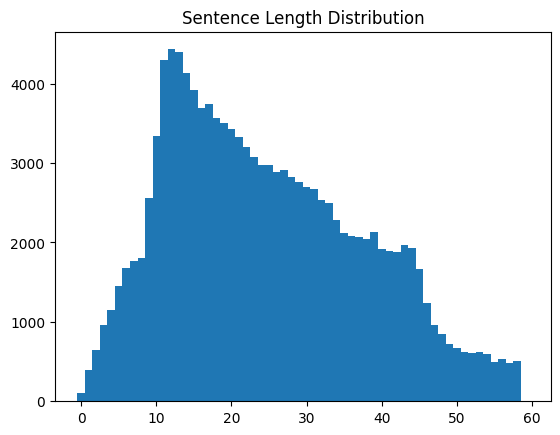

In [9]:
max_len = 60
min_len = 1

# 길이 조건에 맞는 문장만 선택
filtered_corpus = [s for s in document if (len(s) < max_len) & (len(s) >= min_len)]
print('사용 train data 개수: ', len(filtered_corpus))

# 분포도 시각화
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')
plt.show()

### Step 2. SentencePiece를 사용해 모델 학습하기 
- SentencePiece 모델의 __model_type, vocab_size__ 등을 변경해 성능 개선 여부 확인

__SentencePiece Model Train__

In [10]:
import sentencepiece as spm
import os

temp_file = './data/train_data.temp'

with open(temp_file, 'w', encoding='UTF8') as f:
    for row in filtered_corpus:
        f.write(str(row) + '\n')

In [11]:
# Unigram model, vocab_size 8000
spm.SentencePieceTrainer.Train('--input={} --model_prefix=uni8000 --vocab_size=8000'.format(temp_file))

# Unigram model, vocab_size 4000
spm.SentencePieceTrainer.Train('--input={} --model_prefix=uni4000 --vocab_size=4000'.format(temp_file))

# BPE model, vocab_size 8000
spm.SentencePieceTrainer.Train('--input={} --model_prefix=bpe8000 --vocab_size=8000 --model_type=bpe'.format(temp_file))

# BPE model, vocab_size 4000
spm.SentencePieceTrainer.Train('--input={} --model_prefix=bpe4000 --vocab_size=4000 --model_type=bpe'.format(temp_file))


* --input: one-sentence-per-line raw corpus file. __No need to run tokenizer, normalizer or preprocessor.__ By default, SentencePiece normalizes the input with __Unicode [NFKC](https://wodonggun.github.io/study/%ED%95%9C%EA%B8%80-%EC%9D%B8%EC%BD%94%EB%94%A9%EC%9D%B4%EB%9E%80.html)__. You can pass a __comma-separated list__ of files.
* --model_prefix: output model name prefix. __<model_name>.model and <model_name>.vocab are generated.__
* --vocab_size: vocabulary size, e.g., 8000, 16000, or 32000
* --character_coverage: amount of characters covered by the model, __good defaults are: 0.9995__ for languages with rich character set like Japanese or Chinese and 1.0 for other languages with small character set.
* --model_type: model type. Choose from __[unigram](https://process-mining.tistory.com/190) (default), bpe, char, or word.__ The input sentence must be pretokenized when using word type.

### Step 3. 학습된 모델로 sp_tokenize() 메소드 구현 & train, test 데이터셋 생성

In [16]:
# 승현님 코드를 참고함

def sp_tokenize(model_name, vocab, train, test):
    
    s = spm.SentencePieceProcessor()
    s.Load(model_name)
    
    train_list = []
    test_list = []
    
    for sen in train['document']:
        train_list.append(s.EncodeAsIds(sen))
        
    for sen in test['document']:
        test_list.append(s.EncodeAsIds(sen))
        
    with open('./{}'.format(vocab), 'r', encoding='UTF8') as f:
        vocab = f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split('\t')[0]
        
        word_index.update({word:idx})
        index_word.update({idx:word})
        
    train_tensor = tf.keras.preprocessing.sequence.pad_sequences(train_list, maxlen=60, padding='post')
    test_tensor = tf.keras.preprocessing.sequence.pad_sequences(test_list, maxlen=60, padding='post')
    
    train_label = np.array(train['label'])
    test_label = np.array(test['label'])
    
    return train_tensor, train_label, test_tensor, test_label, word_index, index_word

In [18]:
train_uni8, train_label_uni8, test_uni8, test_label_uni8, word_index_uni8, index_word_uni8 = sp_tokenize('./uni8000.model', 'uni8000.vocab', train_data, test_data)
train_uni4, train_label_uni4, test_uni4, test_label_uni4, word_index_uni4, index_word_uni4 = sp_tokenize('./uni4000.model', 'uni4000.vocab', train_data, test_data)
train_bpe8, train_label_bpe8, test_bpe8, test_label_bpe8, word_index_bpe8, index_word_bpe8 = sp_tokenize('./bpe8000.model', 'bpe8000.vocab', train_data, test_data)
train_bpe4, train_label_bpe4, test_bpe4, test_label_bpe4, word_index_bpe4, index_word_bpe4 = sp_tokenize('./bpe4000.model', 'bpe4000.vocab', train_data, test_data)

### Step 4. 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델 재학습하기

__train 80%, validation 20% 비율로 분리__

In [21]:
print(int(len(train_bpe4)*0.2))

29236


In [22]:
def train_val_split(train_data, train_label):
    x_train = train_data[29236:]
    y_train = train_label[29236:]
    
    x_val = train_data[:29236]
    y_val = train_label[:29236]
    
    print('train 데이터셋 개수:', {len(x_train)})
    print('validation 데이터셋 개수:', {len(x_val)})
    
    return x_train, y_train, x_val, y_val

In [23]:
x_train_uni8, y_train_uni8, x_val_uni8, y_val_uni8 = train_val_split(train_uni8, train_label_uni8)
x_train_uni4, y_train_uni4, x_val_uni4, y_val_uni4 = train_val_split(train_uni4, train_label_uni4)
x_train_bpe8, y_train_bpe8, x_val_bpe8, y_val_bpe8 = train_val_split(train_bpe8, train_label_bpe8)
x_train_bpe4, y_train_bpe4, x_val_bpe4, y_val_bpe4 = train_val_split(train_bpe4, train_label_bpe4)

train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}
train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}
train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}
train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}


__RNN(LSTM) 모델 생성__

In [25]:
vocab_size = 8000

# 단어 하나를 표현하는 임베딩 벡터의 차원수
word_vector_dim = 16

model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None, )))
model_rnn.add(tf.keras.layers.LSTM(8))
model_rnn.add(tf.keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          128000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


__모델 훈련__

In [49]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
epochs=10

In [27]:
def run_rnn(x_train, y_train, x_val, y_val):
    history = model_rnn.fit(x_train, y_train,
                    epochs=epochs, batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)
    return history

In [50]:
history_uni8 = run_rnn(x_train_uni8, y_train_uni8, x_val_uni8, y_val_uni8)

Epoch 1/10
457/457 [==============================] - 6s 10ms/step - loss: 0.5538 - accuracy: 0.7450 - val_loss: 0.4211 - val_accuracy: 0.8157
Epoch 2/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3506 - accuracy: 0.8535 - val_loss: 0.3784 - val_accuracy: 0.8403
Epoch 3/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3048 - accuracy: 0.8749 - val_loss: 0.3654 - val_accuracy: 0.8434
Epoch 4/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2810 - accuracy: 0.8857 - val_loss: 0.3683 - val_accuracy: 0.8479
Epoch 5/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2630 - accuracy: 0.8930 - val_loss: 0.3697 - val_accuracy: 0.8479
Epoch 6/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2468 - accuracy: 0.8998 - val_loss: 0.3824 - val_accuracy: 0.8487
Epoch 7/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2312 - accuracy: 0.9059 - val_loss: 0.3926 - val_accuracy: 0.8479
Epoch

In [51]:
history_uni4 = run_rnn(x_train_uni4, y_train_uni4, x_val_uni4, y_val_uni4)

Epoch 1/10
457/457 [==============================] - 4s 9ms/step - loss: 0.7040 - accuracy: 0.5169 - val_loss: 0.6902 - val_accuracy: 0.5209
Epoch 2/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6698 - accuracy: 0.5802 - val_loss: 0.5313 - val_accuracy: 0.7479
Epoch 3/10
457/457 [==============================] - 4s 8ms/step - loss: 0.4164 - accuracy: 0.8167 - val_loss: 0.3888 - val_accuracy: 0.8291
Epoch 4/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3497 - accuracy: 0.8514 - val_loss: 0.3669 - val_accuracy: 0.8384
Epoch 5/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3264 - accuracy: 0.8613 - val_loss: 0.3614 - val_accuracy: 0.8418
Epoch 6/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3098 - accuracy: 0.8684 - val_loss: 0.3597 - val_accuracy: 0.8450
Epoch 7/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2939 - accuracy: 0.8757 - val_loss: 0.3581 - val_accuracy: 0.8436
Epoch 

In [52]:
history_bpe8 = run_rnn(x_train_bpe8, y_train_bpe8, x_val_bpe8, y_val_bpe8)

Epoch 1/10
457/457 [==============================] - 4s 10ms/step - loss: 0.3798 - accuracy: 0.8283 - val_loss: 0.3838 - val_accuracy: 0.8356
Epoch 2/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2581 - accuracy: 0.8946 - val_loss: 0.3907 - val_accuracy: 0.8429
Epoch 3/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2132 - accuracy: 0.9166 - val_loss: 0.4030 - val_accuracy: 0.8400
Epoch 4/10
457/457 [==============================] - 4s 8ms/step - loss: 0.1809 - accuracy: 0.9337 - val_loss: 0.4553 - val_accuracy: 0.8424
Epoch 5/10
457/457 [==============================] - 4s 8ms/step - loss: 0.1555 - accuracy: 0.9461 - val_loss: 0.4513 - val_accuracy: 0.8403
Epoch 6/10
457/457 [==============================] - 4s 8ms/step - loss: 0.1358 - accuracy: 0.9556 - val_loss: 0.5081 - val_accuracy: 0.8364
Epoch 7/10
457/457 [==============================] - 4s 8ms/step - loss: 0.1208 - accuracy: 0.9624 - val_loss: 0.5433 - val_accuracy: 0.8335
Epoch

In [53]:
history_bpe4 = run_rnn(x_train_bpe4, y_train_bpe4, x_val_bpe4, y_val_bpe4)

Epoch 1/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3554 - accuracy: 0.8461 - val_loss: 0.3769 - val_accuracy: 0.8334
Epoch 2/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2754 - accuracy: 0.8850 - val_loss: 0.3776 - val_accuracy: 0.8372
Epoch 3/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2448 - accuracy: 0.9003 - val_loss: 0.3822 - val_accuracy: 0.8383
Epoch 4/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2249 - accuracy: 0.9113 - val_loss: 0.3911 - val_accuracy: 0.8386
Epoch 5/10
457/457 [==============================] - 4s 8ms/step - loss: 0.2073 - accuracy: 0.9205 - val_loss: 0.4167 - val_accuracy: 0.8395
Epoch 6/10
457/457 [==============================] - 4s 8ms/step - loss: 0.1942 - accuracy: 0.9278 - val_loss: 0.4352 - val_accuracy: 0.8378
Epoch 7/10
457/457 [==============================] - 4s 8ms/step - loss: 0.1828 - accuracy: 0.9334 - val_loss: 0.4422 - val_accuracy: 0.8351
Epoch 

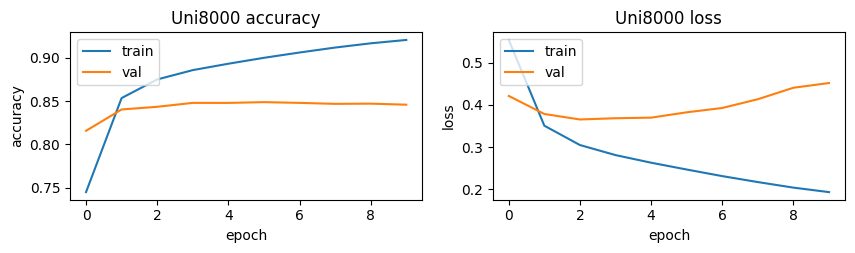

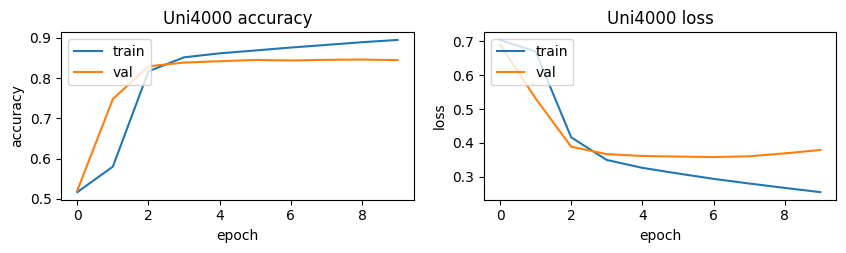

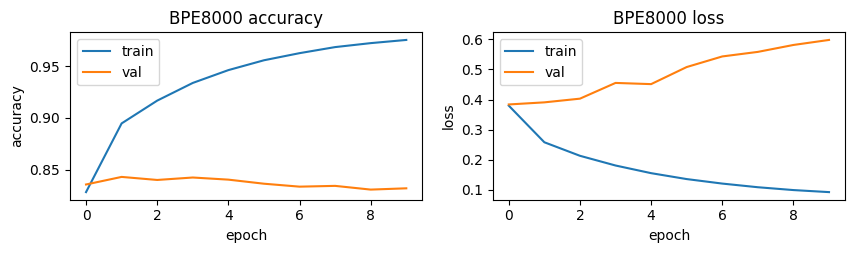

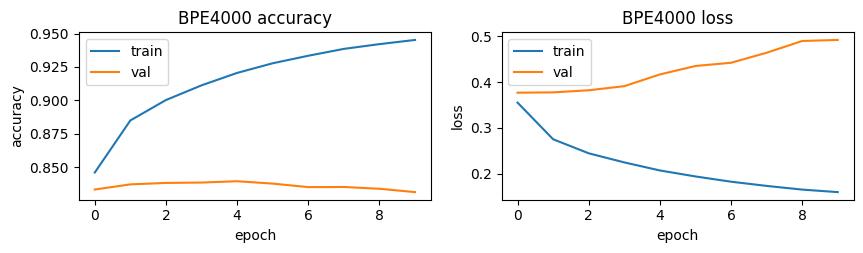

In [54]:
history_list = [(history_uni8, 'Uni8000'), (history_uni4, 'Uni4000'), 
                (history_bpe8, 'BPE8000'), (history_bpe4, 'BPE4000')]

for i, (history, name) in enumerate(history_list):
    plt.figure(figsize=(10,10))
    plt.subplot(4, 2, i*2+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('{} accuracy'.format(name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','val'], loc='upper left')
    
    plt.subplot(4, 2, i*2+2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('{} loss'.format(name))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
plt.show()

BPE보다 Unigram model을 썼을 때, vocab size는 8000개 보다 4000개로 지정했을 때 과적합 되는 경향이 약함. 

10 epoch이후 Unigram model의 loss는 약 0.2 정도로 근사하며, BPE model의 loss는 약 0.1로 근사함.

In [62]:
# 테스트셋을 통한 모델 평가
def test_evalute(x_test, y_test, tok_name):
    results = model_rnn.evaluate(x_test,  y_test, verbose=3)
    print('{}의 loss와 accuracy: '.format(tok_name), results)
    return results

In [63]:
results_uni8 = test_evalute(test_uni8, test_label_uni8, 'uni8')
results_uni4 = test_evalute(test_uni4, test_label_uni4, 'uni4')
results_bpe8 = test_evalute(test_bpe8, test_label_bpe8, 'bpe8')
results_bpe4 = test_evalute(test_bpe4, test_label_bpe4, 'bpe4')

uni8의 loss와 accuracy:  [2.0149545669555664, 0.5035905241966248]
uni4의 loss와 accuracy:  [1.8943583965301514, 0.5131720900535583]
bpe8의 loss와 accuracy:  [0.6538125872612, 0.8092438578605652]
bpe4의 loss와 accuracy:  [0.5048642158508301, 0.8300547003746033]


과적합되는 경향으로 보아 Unigram의 범용성이 더 좋을 것이라 생각했으나, __BPE__ 를 사용했을 때 loss가 약 0.6 정도이며 __accuracy는 80 % 이상__ 으로 BPE의 성능이 더 우수함.

### Step 5. KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기

* 본 프로젝트의 목적은 Tokenizer 종류의 성능 비교이므로, [EP08] 에서 진행한 전처리 과정을 그대로 사용함.

In [84]:
from konlpy.tag import Komoran,Mecab,Okt
tokenizer_list = [Komoran(),Mecab('C:\mecab\mecab-ko-dic'),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019', 'SN'), ('년', 'NNB'), ('12월', 'NNP'), ('중국', 'NNP'), ('우', 'NNP'), ('한', 'NNP'), ('에서', 'JKB'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('뒤', 'NNG'), ('전', 'MM'), ('세계로', 'NNP'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETM'), (',', 'SP'), ('새롭', 'VA'), ('ㄴ', 'ETM'), ('유형', 'NNP'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNP'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]
[Mecab] 
[('코로나', 'NNP'), ('바이러스', 'NNG'), ('는', 'JX'), ('2019', 'SN'), ('년', 'NNBC'), ('12', 'SN'), ('월', 'NNBC'), ('중국', 'NNP'), ('우한', 'NNP'), ('에서', 'JKB'), ('처음', 'NNG'), ('발생', 'NNG'), ('한', 'XSV+ETM'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKB'), ('확산', 'NNG'), ('된', 'XSV+ETM'), (',', 'SC'), ('새로운', 'VA+ETM'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]
[Okt] 
[('코로나바이러스', 'Noun'), ('는', 'Josa'), ('2019년', 'Number'), ('12월', 'Number'), ('중국', 'Noun'), ('우한', 'Nou

__data load__

In [71]:
train_data = pd.read_table('./data/ratings_train.txt')
test_data = pd.read_table('./data/ratings_test.txt')
print('train data 개수: ', len(train_data))
print('test data 개수: ', len(test_data))

train data 개수:  150000
test data 개수:  50000


__data preprocessing__

In [72]:
from konlpy.tag import Komoran,Mecab,Okt
from collections import Counter

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [73]:
def preprocess(train_data, test_data):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')
    
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any')
    
    return train_data, test_data

In [74]:
train_data, test_data = preprocess(train_data, test_data)
print('train data 개수: ', len(train_data))
print('test data 개수: ', len(test_data))

train data 개수:  146182
test data 개수:  49157


In [78]:
def konlpy_tokenize(train_data, test_data, tokenizer, num_words=4000):
    tok = tokenizer
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tok.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tok.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
  

__Komoran, Mecab, Okt 형태소 분석기를 사용해 데이터셋과 word_to_index & index_to_word 생성__

In [81]:
x_train_Kmrn, y_train_Kmrn, X_test_Kmrn, y_test_Kmrn, word_to_index_Kmrn = konlpy_tokenize(train_data, test_data, Komoran()) 

In [88]:
index_to_word_Kmrn = {index:word for word, index in word_to_index_Kmrn.items()}

In [80]:
x_train_Mcb, y_train_Mcb, X_test_Mcb, y_test_Mcb, word_to_index_Mcb = konlpy_tokenize(train_data, test_data, Mecab('C:\mecab\mecab-ko-dic')) 

In [89]:
index_to_word_Mcb = {index:word for word, index in word_to_index_Mcb.items()}

In [83]:
x_train_Okt, y_train_Okt, X_test_Okt, y_test_Okt, word_to_index_Okt = konlpy_tokenize(train_data, test_data, Okt()) 

In [90]:
index_to_word_Okt = {index:word for word, index in word_to_index_Okt.items()}

train, test 데이터 개수 확인

In [85]:
print(f'x_train_Kmrn 개수: {len(x_train_Kmrn)}, X_test_Kmrn 개수: {len(X_test_Kmrn)}')
print(f'y_train_Kmrn 개수: {len(y_train_Kmrn)}, y_test_Kmrn 개수: {len(y_test_Kmrn)}')

x_train_Kmrn 개수: 146182, X_test_Kmrn 개수: 49157
y_train_Kmrn 개수: 146182, y_test_Kmrn 개수: 49157


In [91]:
# 문장 1개와 딕셔너리를 함께 주면, 단어 인덱스 리스트 벡터로 변환

# 단, 모든 문장은 <SOS>로 시작
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<SOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수

#[1:]를 통해 <SOS>를 제외
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

Komoran, Mecab, Okt 샘플 확인

In [93]:
print(x_train_Kmrn[0])
print('라벨:', y_train_Kmrn[0])
print('1번째 리뷰 문장 길이: ', len(x_train_Kmrn[0]))
print(get_decoded_sentence(x_train_Kmrn[0], index_to_word_Kmrn))

[20, 520, 4, 4, 47, 233, 23, 51, 751]
라벨: 0
1번째 리뷰 문장 길이:  9
더빙 . . 진짜 짜증 나 네요 목소리


In [94]:
print(x_train_Mcb[0])
print('라벨:', y_train_Mcb[0])
print('1번째 리뷰 문장 길이: ', len(x_train_Mcb[0]))
print(get_decoded_sentence(x_train_Mcb[0], index_to_word_Mcb))

[32, 74, 919, 4, 4, 39, 228, 20, 33, 748]
라벨: 0
1번째 리뷰 문장 길이:  10
더 빙 . . 진짜 짜증 나 네요 목소리


In [95]:
print(x_train_Okt[0])
print('라벨:', y_train_Okt[0])
print('1번째 리뷰 문장 길이: ', len(x_train_Okt[0]))
print(get_decoded_sentence(x_train_Okt[0], index_to_word_Okt))

[49, 451, 6, 16, 2, 670]
라벨: 0
1번째 리뷰 문장 길이:  6
더빙 .. 진짜 <UNK> 목소리


__데이터 분석 및 가공__
1. 데이터셋의 문장 길이 분포 확인
2. 최대 문장 길이 지정
3. padding 추가

__Komoran__ 형태소 분석기로 encoding한 데이터셋 분석 및 가공

In [101]:
total_data_text = list(x_train_Kmrn) + list(X_test_Kmrn)

# 각 텍스트의 문장길이 정보를 담은 리스트 생성
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차 확인
print('문장길이 평균: ', np.mean(num_tokens))
print('문장길이 최대: ', np.max(num_tokens))
print('문장길이 표준편차: ', np.std(num_tokens))

# 최대 길이를 위 sentencepiece와 동일한 60 으로 한다면, 몇 %의 데이터가 포함되는지 확인
maxlen = 60
print('pad_sequences maxlen:', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함.'.format(np.sum(num_tokens < 60)/len(num_tokens)))

# 패딩 추가
x_train_Kmrn_pad = tf.keras.preprocessing.sequence.pad_sequences(x_train_Kmrn,
                                                       value=word_to_index_Kmrn['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
X_test_Kmrn_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_Kmrn,
                                                       value=word_to_index_Kmrn['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
print(f'x_train_Kmrn_pad: {x_train_Kmrn_pad.shape}')
print(f'X_test_Kmrn_pad: {X_test_Kmrn_pad.shape}')

문장길이 평균:  16.814082185329095
문장길이 최대:  140
문장길이 표준편차:  13.858521612445328
pad_sequences maxlen: 60
전체 문장의 0.9749205227834687%가 maxlen 설정값 이내에 포함.
x_train_Kmrn_pad: (146182, 60)
X_test_Kmrn_pad: (49157, 60)


In [102]:
for i in range(2):
    label = y_train_Kmrn[i]
    encode = x_train_Kmrn_pad[i]
    decode = get_decoded_sentence(x_train_Kmrn_pad[i], index_to_word_Kmrn)
    print(f'label: {label}\n\
    encode: {encode}\n\
    decode: {decode}')

label: 0
    encode: [ 20 520   4   4  47 233  23  51 751   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
    decode: 더빙 . . 진짜 짜증 나 네요 목소리 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
label: 1
    encode: [1031   14  541  230  699    7  200  149 1529   59  850  756   19   53
  404    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
    decode: ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 가볍 지 않 구나 <PAD> <PAD> 

__Mecab__ 형태소 분석기로 encoding한 데이터셋 분석 및 가공

In [104]:
total_data_text = list(x_train_Mcb) + list(X_test_Mcb)

# 각 텍스트의 문장길이 정보를 담은 리스트 생성
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차 확인
print('문장길이 평균: ', np.mean(num_tokens))
print('문장길이 최대: ', np.max(num_tokens))
print('문장길이 표준편차: ', np.std(num_tokens))

# 최대 길이를 위 sentencepiece와 동일한 60 으로 한다면, 몇 %의 데이터가 포함되는지 확인
maxlen = 60
print('pad_sequences maxlen:', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함.'.format(np.sum(num_tokens < 60)/len(num_tokens)))

# 패딩 추가
x_train_Mcb_pad = tf.keras.preprocessing.sequence.pad_sequences(x_train_Mcb,
                                                       value=word_to_index_Mcb['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
X_test_Mcb_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_Mcb,
                                                       value=word_to_index_Mcb['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
print(f'x_train_Kmrn_pad: {x_train_Mcb_pad.shape}')
print(f'X_test_Kmrn_pad: {X_test_Mcb_pad.shape}')

문장길이 평균:  15.969376315021577
문장길이 최대:  116
문장길이 표준편차:  12.843535456326455
pad_sequences maxlen: 60
전체 문장의 0.9859833417801873%가 maxlen 설정값 이내에 포함.
x_train_Kmrn_pad: (146182, 60)
X_test_Kmrn_pad: (49157, 60)


In [105]:
for i in range(2):
    label = y_train_Mcb[i]
    encode = x_train_Mcb_pad[i]
    decode = get_decoded_sentence(x_train_Mcb_pad[i], index_to_word_Mcb)
    print(f'label: {label}\n\
    encode: {encode}\n\
    decode: {decode}')

label: 0
    encode: [ 32  74 919   4   4  39 228  20  33 748   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
    decode: 더 빙 . . 진짜 짜증 나 네요 목소리 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
label: 1
    encode: [1028    4   11  519  549  687    5  120    4   70 1639   52  925 1006
   15   44  391    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
    decode: . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나 <PAD> <PAD> <PA

__Okt__ 형태소 분석기로 encoding한 데이터셋 분석 및 가공

In [106]:
total_data_text = list(x_train_Okt) + list(X_test_Okt)

# 각 텍스트의 문장길이 정보를 담은 리스트 생성
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차 확인
print('문장길이 평균: ', np.mean(num_tokens))
print('문장길이 최대: ', np.max(num_tokens))
print('문장길이 표준편차: ', np.std(num_tokens))

# 최대 길이를 위 sentencepiece와 동일한 60 으로 한다면, 몇 %의 데이터가 포함되는지 확인
maxlen = 60
print('pad_sequences maxlen:', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함.'.format(np.sum(num_tokens < 60)/len(num_tokens)))

# 패딩 추가
x_train_Okt_pad = tf.keras.preprocessing.sequence.pad_sequences(x_train_Okt,
                                                       value=word_to_index_Okt['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
X_test_Okt_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_Okt,
                                                       value=word_to_index_Okt['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)
print(f'x_train_Kmrn_pad: {x_train_Okt_pad.shape}')
print(f'X_test_Kmrn_pad: {X_test_Okt_pad.shape}')

문장길이 평균:  12.806930515667634
문장길이 최대:  95
문장길이 표준편차:  10.399093335789471
pad_sequences maxlen: 60
전체 문장의 0.9992474621043417%가 maxlen 설정값 이내에 포함.
x_train_Kmrn_pad: (146182, 60)
X_test_Kmrn_pad: (49157, 60)


In [107]:
for i in range(2):
    label = y_train_Okt[i]
    encode = x_train_Okt_pad[i]
    decode = get_decoded_sentence(x_train_Okt_pad[i], index_to_word_Okt)
    print(f'label: {label}\n\
    encode: {encode}\n\
    decode: {decode}')

label: 0
    encode: [ 49 451   6  16   2 670   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
    decode: 더빙 .. 진짜 <UNK> 목소리 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
label: 1
    encode: [ 936    8  452   44  618    5  204   35 1602   21  996    2    2    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
    decode: ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 <UNK> <

__train(80%), validation(20%) set 구성__

In [108]:
print(int(len(x_train_Okt_pad)*0.2))

29236


In [109]:
def train_val_split(train_data, train_label):
    x_train = train_data[29236:]
    y_train = train_label[29236:]
    
    x_val = train_data[:29236]
    y_val = train_label[:29236]
    
    print('train 데이터셋 개수:', {len(x_train)})
    print('validation 데이터셋 개수:', {len(x_val)})
    
    return x_train, y_train, x_val, y_val

In [110]:
x_train_Kmrn, y_train_Kmrn, x_val_Kmrn, y_val_Kmrn = train_val_split(x_train_Kmrn_pad, y_train_Kmrn)
x_train_Mcb, y_train_Mcb, x_val_Mcb, y_val_Mcb = train_val_split(x_train_Mcb_pad, y_train_Mcb)
x_train_Okt, y_train_Okt, x_val_Okt, y_val_Okt = train_val_split(x_train_Okt_pad, y_train_Okt)

train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}
train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}
train 데이터셋 개수: {116946}
validation 데이터셋 개수: {29236}


__RNN(LSTM) 모델 생성__

In [112]:
vocab_size = 8000

# 단어 하나를 표현하는 임베딩 벡터의 차원수
word_vector_dim = 16

model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None, )))
model_rnn.add(tf.keras.layers.LSTM(8))
model_rnn.add(tf.keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          128000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


__모델 훈련__

In [113]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
epochs=10

In [114]:
def run_rnn(x_train, y_train, x_val, y_val):
    history = model_rnn.fit(x_train, y_train,
                    epochs=epochs, batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)
    return history

In [115]:
history_Kmrn = run_rnn(x_train_Kmrn, y_train_Kmrn, x_val_Kmrn, y_val_Kmrn)

Epoch 1/10
457/457 [==============================] - 6s 9ms/step - loss: 0.5630 - accuracy: 0.7110 - val_loss: 0.4210 - val_accuracy: 0.8187
Epoch 2/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3891 - accuracy: 0.8276 - val_loss: 0.3723 - val_accuracy: 0.8348
Epoch 3/10
457/457 [==============================] - 3s 7ms/step - loss: 0.3648 - accuracy: 0.8370 - val_loss: 0.3661 - val_accuracy: 0.8337
Epoch 4/10
457/457 [==============================] - 3s 8ms/step - loss: 0.3530 - accuracy: 0.8405 - val_loss: 0.3659 - val_accuracy: 0.8323
Epoch 5/10
457/457 [==============================] - 3s 8ms/step - loss: 0.3455 - accuracy: 0.8436 - val_loss: 0.3657 - val_accuracy: 0.8376
Epoch 6/10
457/457 [==============================] - 3s 8ms/step - loss: 0.3375 - accuracy: 0.8452 - val_loss: 0.3632 - val_accuracy: 0.8377
Epoch 7/10
457/457 [==============================] - 3s 8ms/step - loss: 0.3309 - accuracy: 0.8483 - val_loss: 0.3667 - val_accuracy: 0.8395
Epoch 

In [116]:
history_Mcb = run_rnn(x_train_Mcb, y_train_Mcb, x_val_Mcb, y_val_Mcb)

Epoch 1/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6971 - accuracy: 0.5026 - val_loss: 0.6928 - val_accuracy: 0.5016
Epoch 2/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6924 - accuracy: 0.5097 - val_loss: 0.6922 - val_accuracy: 0.5036
Epoch 3/10
457/457 [==============================] - 3s 8ms/step - loss: 0.6624 - accuracy: 0.5669 - val_loss: 0.4751 - val_accuracy: 0.7793
Epoch 4/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3816 - accuracy: 0.8306 - val_loss: 0.3559 - val_accuracy: 0.8423
Epoch 5/10
457/457 [==============================] - 3s 8ms/step - loss: 0.3404 - accuracy: 0.8506 - val_loss: 0.3473 - val_accuracy: 0.8470
Epoch 6/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3262 - accuracy: 0.8575 - val_loss: 0.3423 - val_accuracy: 0.8496
Epoch 7/10
457/457 [==============================] - 3s 8ms/step - loss: 0.3149 - accuracy: 0.8629 - val_loss: 0.3410 - val_accuracy: 0.8474
Epoch 

In [117]:
history_Okt = run_rnn(x_train_Okt, y_train_Okt, x_val_Okt, y_val_Okt)

Epoch 1/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6971 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 2/10
457/457 [==============================] - 3s 7ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5019
Epoch 3/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6928 - val_accuracy: 0.5040
Epoch 4/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6924 - accuracy: 0.5108 - val_loss: 0.6924 - val_accuracy: 0.5104
Epoch 5/10
457/457 [==============================] - 4s 8ms/step - loss: 0.5140 - accuracy: 0.7245 - val_loss: 0.3815 - val_accuracy: 0.8268
Epoch 6/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3634 - accuracy: 0.8361 - val_loss: 0.3598 - val_accuracy: 0.8361
Epoch 7/10
457/457 [==============================] - 4s 8ms/step - loss: 0.3449 - accuracy: 0.8435 - val_loss: 0.3660 - val_accuracy: 0.8345
Epoch 

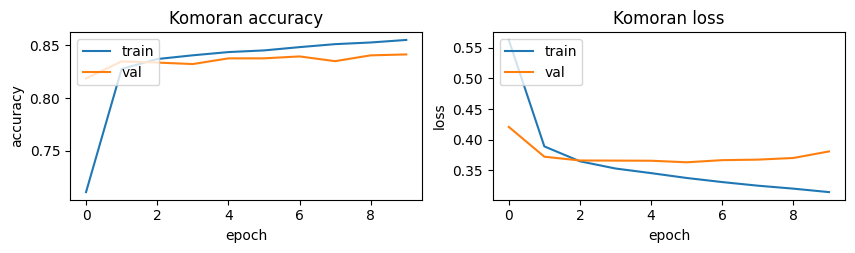

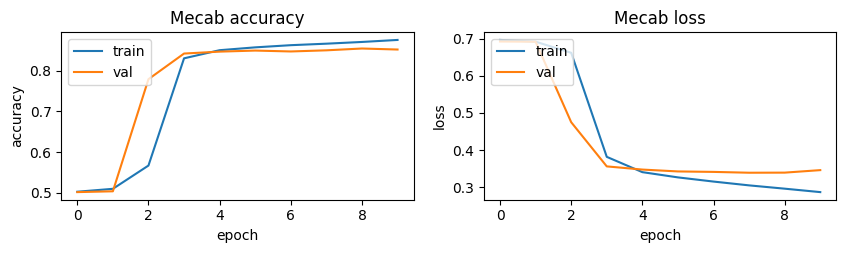

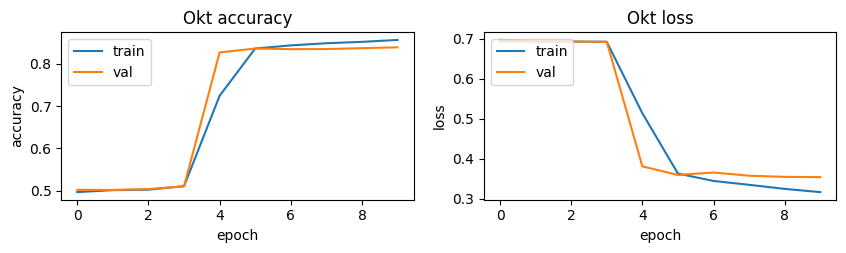

In [118]:
history_list = [(history_Kmrn, 'Komoran'), (history_Mcb, 'Mecab'), 
                (history_Okt, 'Okt')]

for i, (history, name) in enumerate(history_list):
    plt.figure(figsize=(10,10))
    plt.subplot(4, 2, i*2+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('{} accuracy'.format(name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','val'], loc='upper left')
    
    plt.subplot(4, 2, i*2+2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('{} loss'.format(name))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
plt.show()

In [119]:
# 테스트셋을 통한 모델 평가
def test_evalute(x_test, y_test, tok_name):
    results = model_rnn.evaluate(x_test,  y_test, verbose=3)
    print('{}의 loss와 accuracy: '.format(tok_name), results)
    return results

In [128]:
results_Komoran = test_evalute(X_test_Kmrn_pad, y_test_Kmrn, 'Komoran')
results_Mecab = test_evalute(X_test_Mcb_pad, y_test_Mcb, 'Mecab')
results_Okt = test_evalute(X_test_Okt_pad, y_test_Okt, 'Okt')

Komoran의 loss와 accuracy:  [1.216315746307373, 0.4956974685192108]
Mecab의 loss와 accuracy:  [1.059517741203308, 0.5438696146011353]
Okt의 loss와 accuracy:  [0.368734210729599, 0.8329840898513794]


Konlpy에서 제공하는 다양한 종류의 형태소 분석기 중 Komoran, Mecab, Okt를 사용해보았음. 이때 __Okt의 accuracy만 83%__ 에 근사했으며 Komoran 과 Mecab은 Sentencepiece의 Unigram 모델과 비슷한 정확도와 함께 미진한 성능을 보임 (약 50%).

Konlpy의 형태소 분석기는 Sentencepiece보다 더 많은 전처리 과정을 필요로 함. 특히나, Konlpy 사용시 불용어 제거과정까지 거쳤지만, Okt를 제외하고 성능이 충분치 못함.